In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# define the target function f(x) = x^2
def f(x):
  return x**2

a_estimators = []
b_estimators = []

for i in range(50000):
  x1 = np.random.uniform(-1, 1, 1)
  x2 = np.random.uniform(-1, 1, 1)
  y1 = f(x1)
  y2 = f(x2)

  # find the slope for current pair of points
  a = (y1 - y2)/(x1 - x2)
  # find y intercept for current pair of points
  b = ((x1 * y2) - (x2 * y1))/(x1 - x2)
  a_estimators = np.append(a_estimators, a)
  b_estimators = np.append(b_estimators, b)

# estimators based on in sample points (seen points)
a_mean = np.mean(a_estimators)
b_mean = np.mean(b_estimators)
print(a_mean)
print(b_mean)

-0.00239589391178591
0.002902692218243609


In [ ]:
# lists of "x's"
# i.e. x, x^2, etc.
x = np.random.uniform(-1, 1, 100000)
x2 = [i**2 for i in x]
x3 = [i**3 for i in x]
x4 = [i**4 for i in x]
# expected value of needed "x's"
# i.e. E[x], E[x^2], etc.
Ex = np.mean(x)
Ex2 = np.mean(x2)
Ex3 = np.mean(x3)
Ex4 = np.mean(x4)

# Out of sample error, calculated from subsituting ax+b for gD(x) and x^2 for f(x) into book equation and reordering/simplifying.
Eout = Ex4 - (2*a_estimators*Ex3) + ((a_estimators**2 - 2*b_estimators)*Ex2) + (2*a_estimators*b_estimators*Ex) + b_estimators**2
E_Eout = np.mean(Eout)
print("E[E_out]:", E_Eout)

# find bias for each line and add to bias list
# bias equation from book, sub in ax+b for g_bar
bias_list = []
for i in range(len(x)):
  bias_i = ((a_mean*x[i]) + b_mean - f(x[i]))**2
  bias_list = np.append(bias_list, bias_i)

a_i_a_bar = [a_i - a_mean for a_i in a_estimators]
b_i_b_bar = [b_i - b_mean for b_i in b_estimators]
a_i_a_bar2 = [i**2 for i in a_i_a_bar]
b_i_b_bar2 = [i**2 for i in b_i_b_bar]

# solving for variance by splitting the var formula into three pieces
diff_mean = np.mean(a_i_a_bar2)
var_term1 = np.mean([i*diff_mean for i in x2])

list_prod = [a*b for a,b in zip(a_i_a_bar, b_i_b_bar)]
diff_mean_product_coeff = 2*np.mean(list_prod)
var_term2 = np.mean([i*diff_mean_product_coeff for i in x])

var_term3 = np.mean(b_i_b_bar2)

E[E_out]: 0.5299944743766427


In [ ]:
# take the average bias from list of biases from previous cell
bias = np.mean(bias_list)
print("bias:", bias)

# solve for var from previous cell
var = var_term1 + var_term2 + var_term3
print("var:", var)

print("bias + var =", bias+var, "= E[E_out] =", E_Eout)

bias: 0.19790368239130576
var: 0.33209079198533703
bias + var = 0.5299944743766428 = E[E_out] = 0.5299944743766427


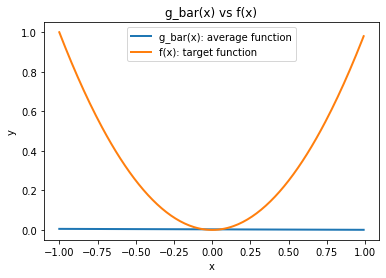

In [11]:
# setting up g_bar(x) for plotting
x_axis = np.arange(-1, 1, 0.01)
y_axis = []
target_y = []

for i in range(len(x_axis)):
  y = a_mean*(x_axis[i]) + b_mean
  y_target = (x_axis[i])**2
  y_axis = np.append(y_axis, y)
  target_y = np.append(target_y, y_target)

g_bar, = plt.plot(x_axis, y_axis, linewidth=2)
f, = plt.plot(x_axis, target_y, linewidth=2)
plt.legend([g_bar, f], ['g_bar(x): average function', 'f(x): target function'])
plt.title("g_bar(x) vs f(x)")
plt.xlabel("x")
plt.ylabel("y")            
plt.show()